In [1]:
from numba import cuda
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from PIL import Image
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
im = plt.imread("/content/drive/MyDrive/Colab Notebooks/image1.jpg")

In [4]:
shape = np.shape(im)
shape

(1080, 1920, 3)

In [5]:
devdata = cuda.to_device(im)
devOuput = cuda.device_array(shape, np.uint8)

In [6]:

@cuda.jit
def grayscale(src, dst):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

  g = np.uint8((src[tidx, tidy, 0] + src[tidx, tidy, 1] + src[tidx, tidy, 2]) / 3)
  dst[tidx, tidy, 0] = dst[tidx, tidy, 1] = dst[tidx, tidy, 2] = g

In [7]:
def testfunc(x,y):
  t1 = time.time()
  blockSize = (x, y)
  gridSize = (math.ceil(shape[0]/blockSize[0]),math.ceil(shape[1]/blockSize[1]))
  grayscale[gridSize, blockSize](devdata, devOuput)
  t2 = time.time()
  t = t2 - t1

  return t


In [15]:
resultname = []
listi = [1,2,4,8,16,24,32,64,128,512,1024]
listj = [1,2,4,8,16,24,32,64,128,512,1024]
listi2 = []
listj2 = []

for i in listi:
  for j in listj:
      if (i*j)<=1024:
        resultname.append((i,j))

resultname

[(1, 1),
 (1, 2),
 (1, 4),
 (1, 8),
 (1, 16),
 (1, 24),
 (1, 32),
 (1, 64),
 (1, 128),
 (1, 512),
 (1, 1024),
 (2, 1),
 (2, 2),
 (2, 4),
 (2, 8),
 (2, 16),
 (2, 24),
 (2, 32),
 (2, 64),
 (2, 128),
 (2, 512),
 (4, 1),
 (4, 2),
 (4, 4),
 (4, 8),
 (4, 16),
 (4, 24),
 (4, 32),
 (4, 64),
 (4, 128),
 (8, 1),
 (8, 2),
 (8, 4),
 (8, 8),
 (8, 16),
 (8, 24),
 (8, 32),
 (8, 64),
 (8, 128),
 (16, 1),
 (16, 2),
 (16, 4),
 (16, 8),
 (16, 16),
 (16, 24),
 (16, 32),
 (16, 64),
 (24, 1),
 (24, 2),
 (24, 4),
 (24, 8),
 (24, 16),
 (24, 24),
 (24, 32),
 (32, 1),
 (32, 2),
 (32, 4),
 (32, 8),
 (32, 16),
 (32, 24),
 (32, 32),
 (64, 1),
 (64, 2),
 (64, 4),
 (64, 8),
 (64, 16),
 (128, 1),
 (128, 2),
 (128, 4),
 (128, 8),
 (512, 1),
 (512, 2),
 (1024, 1)]

In [16]:
result = []

for i in resultname:
    t3 = testfunc(i[0], i[1])
    result.append(t3)

l = list(range(len(result)))


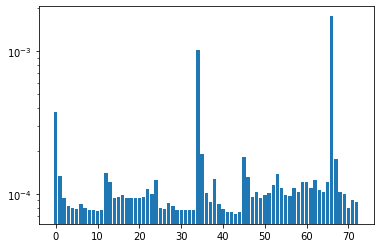

In [17]:
plt.bar(l,result)
plt.yscale("log")